# Natural Language Processing in Tensorflow Course Week 1

## Learning Outcome 
   Word based encodings <br>
   Using Tensorflow and Keras
   Tokenizer <br>
    fit_on_texts <br>
    text_to_sequence <br>
    


In [28]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [39]:
# Which of these languages you are most interested in, Javascript or Python? 
sentences = [
            ' I love Python Language',
            ' I love Javascript', 
            ' Which of these languages you are most interested in, Javascript or Python? ' ,
            'Today you are learning NLP in TensorFlow (Python)'

]

In [36]:
# point 1 TOKENIZER, fit_on_texts
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>') #create an instance of the tokenizer, pass a parameter num_words = 100, tokenizer will take top hundred words and tokenize those. 
tokenizer.fit_on_texts(sentences) # fit on texts methods takes in the data and tokenize it
word_index = tokenizer.word_index #The tokenizer provides a word index property which returns a dictionary containing key value pairs, where the key is the word


**fit_on_texts** Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
<br>
<br>
**texts_to_sequences** Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [37]:
print(word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'python': 4, 'javascript': 5, 'language': 6, 'which': 7, 'of': 8, 'these': 9, 'languages': 10, 'you': 11, 'are': 12, 'most': 13, 'interested': 14, 'in': 15, 'or': 16}


In [40]:
# point 2 texts_to_sequences
sequences = tokenizer.texts_to_sequences(sentences) # call on the tokenizer to turn the sequences, texts to sequences 
print(sequences)

[[2, 3, 4, 6], [2, 3, 5], [7, 8, 9, 10, 11, 12, 13, 14, 15, 5, 16, 4], [1, 11, 12, 1, 1, 15, 1, 4]]


Use the 'OOV' parameter 

In [ ]:
#POINT 3 oov_token
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')


In [43]:
#POINT 4 padding

padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=12)
print(padded)


[[ 2  3  4  6  0  0  0  0  0  0  0  0]
 [ 2  3  5  0  0  0  0  0  0  0  0  0]
 [ 7  8  9 10 11 12 13 14 15  5 16  4]
 [ 1 11 12  1  1 15  1  4  0  0  0  0]]



# BBC text categorization

In [2]:
vocab_size = 1000 
embedding_dim = 16 
max_length = 120 
trunc_type = 'post' 
padding_type = 'post' 
oov_tok = "<OOV>" 
training_portion = .8

In [3]:
sentences = []
labels = []
#A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [26]:
import pandas as pd
data = pd.read_csv("bbc-text.csv")

In [27]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
with open("bbc-text.csv", 'r') as csvfile:
    
    reader =csv.reader(csvfile, delimiter=',') 
    next(reader)
    for row in reader:
      labels.append(row[0])
      sentence = row[1]
      for words in stopwords:
        token = " " + words + " "
        sentence = sentence.replace(token, " ")
      sentences.append(sentence)  # YOUR CODE HERE

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [6]:
train_size = int(len(sentences)*training_portion) # YOUR CODE HERE

train_sentences = sentences[:train_size] # YOUR CODE HERE
train_labels = labels[:train_size]# YOUR CODE HERE

validation_sentences = sentences[train_size:]# YOUR CODE HERE
validation_labels = labels[train_size:]# YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)# YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE)
word_index =tokenizer.word_index # YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences)# YOUR CODE HERE
train_padded =pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [8]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)# YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)# YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [9]:
label_tokenizer = Tokenizer()# YOUR CODE HERE
label_tokenizer.fit_on_texts(labels)# YOUR CODE HERE)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))# YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))  # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAvgPool1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')


])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2)

Epoch 1/30
56/56 - 0s - loss: 1.7639 - accuracy: 0.3011 - val_loss: 1.7253 - val_accuracy: 0.4180
Epoch 2/30
56/56 - 0s - loss: 1.6825 - accuracy: 0.3854 - val_loss: 1.6276 - val_accuracy: 0.4292
Epoch 3/30
56/56 - 0s - loss: 1.5685 - accuracy: 0.4478 - val_loss: 1.5039 - val_accuracy: 0.4607
Epoch 4/30
56/56 - 0s - loss: 1.4219 - accuracy: 0.4652 - val_loss: 1.3530 - val_accuracy: 0.5011
Epoch 5/30
56/56 - 0s - loss: 1.2424 - accuracy: 0.5916 - val_loss: 1.1792 - val_accuracy: 0.6112
Epoch 6/30
56/56 - 0s - loss: 1.0611 - accuracy: 0.7466 - val_loss: 1.0178 - val_accuracy: 0.7663
Epoch 7/30
56/56 - 0s - loss: 0.8970 - accuracy: 0.8444 - val_loss: 0.8754 - val_accuracy: 0.8292
Epoch 8/30
56/56 - 0s - loss: 0.7525 - accuracy: 0.8994 - val_loss: 0.7511 - val_accuracy: 0.8382
Epoch 9/30
56/56 - 0s - loss: 0.6287 - accuracy: 0.9174 - val_loss: 0.6440 - val_accuracy: 0.8607
Epoch 10/30
56/56 - 0s - loss: 0.5262 - accuracy: 0.9298 - val_loss: 0.5535 - val_accuracy: 0.8854
Epoch 11/30
56/56 -

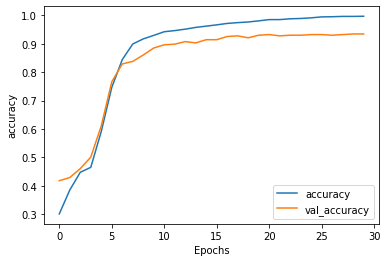

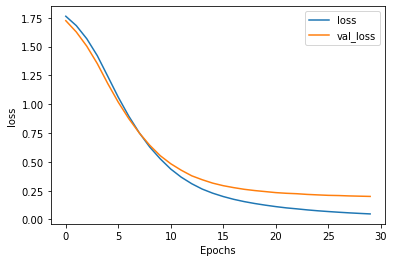

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")